<a href="https://colab.research.google.com/github/KinzaAslam/ClothingAnalytics/blob/main/ClothingAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Updated brand list
local_brands = ['Khaadi', 'Gul Ahmed', 'Alkaram Studio', 'Junaid Jamshed (J.)', 'Sapphire', 'Bonanza Satrangi',
                'Nishat Linen', 'ChenOne', 'Ego', 'Bareeze']

# Create the updated dataset
np.random.seed(42)
types = ['Coat', 'Jacket', 'Sweater', 'Scarf', 'Gloves', 'Hat', 'Boots']
preferences = ['Warm', 'Stylish', 'Comfortable', 'Lightweight', 'Durable', 'Waterproof']
dislikes = ['Bulky', 'Not warm enough', 'Heavy', 'Expensive', 'Itchy', 'Not durable']

data = {
    'ID': range(1, 101),
    'Type': np.random.choice(types, 100),
    'Brand': np.random.choice(local_brands, 100),
    'Customer Preferences': np.random.choice(preferences, 100),
    'Price': np.round(np.random.uniform(15, 200, 100), 2),
    'Customer Likes': np.random.choice(preferences, 100),
    'Customer Dislikes': np.random.choice(dislikes, 100),
}

df = pd.DataFrame(data)

# Analyzing the customer preferences (likes) to find the highest and lowest liked items

# Calculate the count of each 'Customer Likes' preference
customer_likes_counts = df['Customer Likes'].value_counts()

# Highest customer preference
highest_preference = customer_likes_counts.idxmax()
highest_preference_count = customer_likes_counts.max()

# Lowest customer preference
lowest_preference = customer_likes_counts.idxmin()
lowest_preference_count = customer_likes_counts.min()

# Identifying the products associated with the highest and lowest customer preferences
most_favored_products = df[df['Customer Likes'] == highest_preference]
least_favored_products = df[df['Customer Likes'] == lowest_preference]

# Results
highest_preference, highest_preference_count, most_favored_products.head(), lowest_preference, lowest_preference_count, least_favored_products.head()

('Durable',
 22,
     ID     Type           Brand Customer Preferences   Price Customer Likes  \
 4    5  Sweater        Sapphire          Comfortable   56.49        Durable   
 6    7   Gloves        Sapphire              Durable   58.89        Durable   
 10  11    Boots             Ego                 Warm  172.11        Durable   
 19  20    Scarf  Alkaram Studio           Waterproof  180.03        Durable   
 20  21      Hat          Khaadi              Stylish  131.76        Durable   
 
    Customer Dislikes  
 4        Not durable  
 6              Heavy  
 10             Itchy  
 19             Bulky  
 20         Expensive  ,
 'Comfortable',
 12,
     ID    Type         Brand Customer Preferences   Price Customer Likes  \
 0    1   Boots       ChenOne          Lightweight   44.75    Comfortable   
 26  27   Scarf       Bareeze          Comfortable  148.65    Comfortable   
 29  30  Gloves           Ego           Waterproof  134.41    Comfortable   
 61  62  Jacket  Nishat Lin

<ipython-input-2-4e22ffebef40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=most_favored_products, x='Type', palette='viridis')


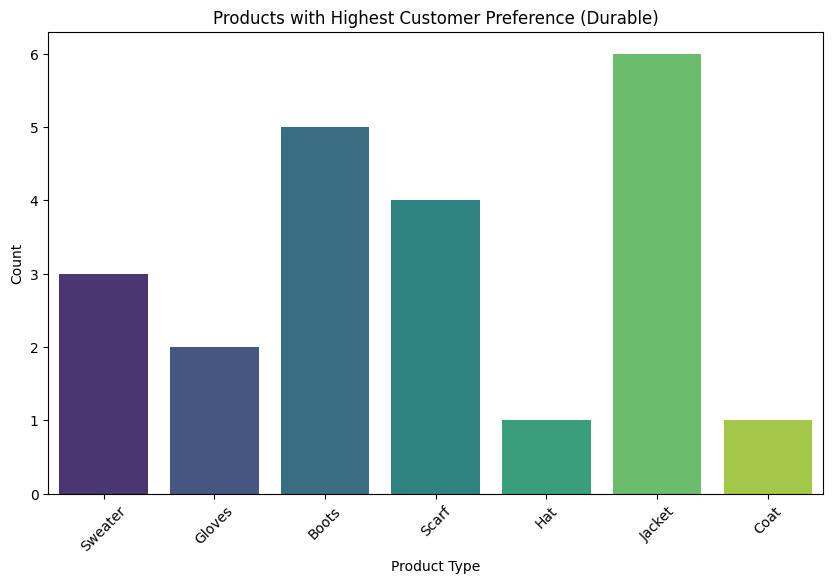

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=most_favored_products, x='Type', palette='viridis')
plt.title('Products with Highest Customer Preference (Durable)')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-3-c24eda964f95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=least_favored_products, x='Type', palette='viridis')


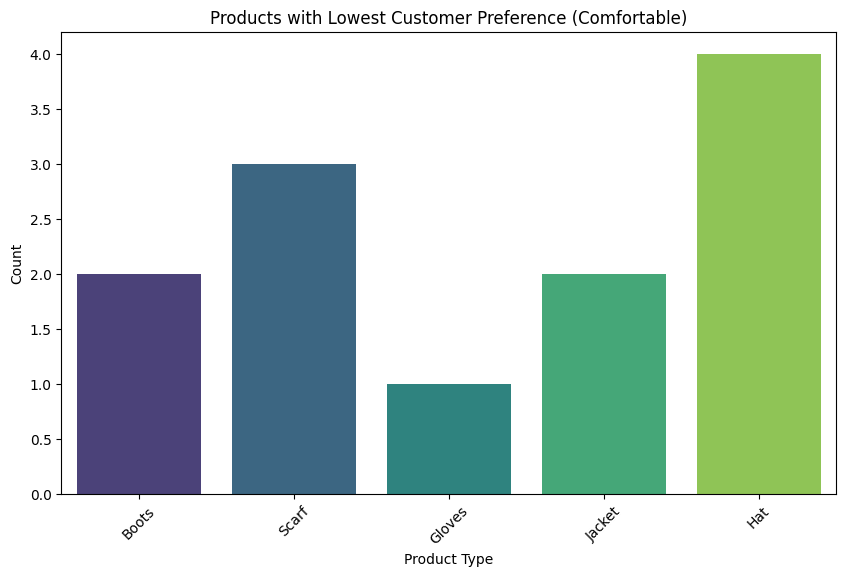

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=least_favored_products, x='Type', palette='viridis')
plt.title('Products with Lowest Customer Preference (Comfortable)')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-5-dd327419e0ae>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=warm_likes, x='Type', palette='viridis')


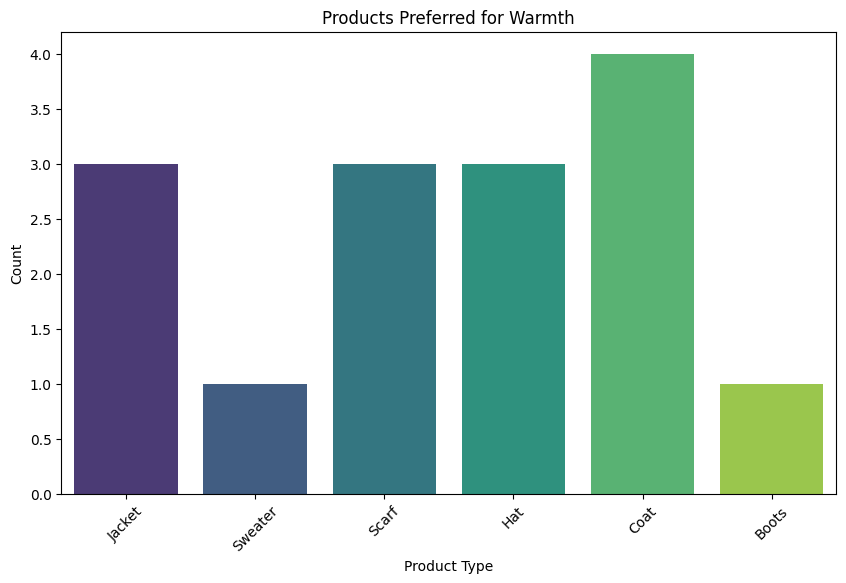

In [ ]:
# Filter the dataframe to get items liked for their warmth
warm_likes = df[df['Customer Likes'] == 'Warm']

# Visualize the items most frequently liked for their warmth
plt.figure(figsize=(10, 6))
sns.countplot(data=warm_likes, x='Type', palette='viridis')
plt.title('Products Preferred for Warmth')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


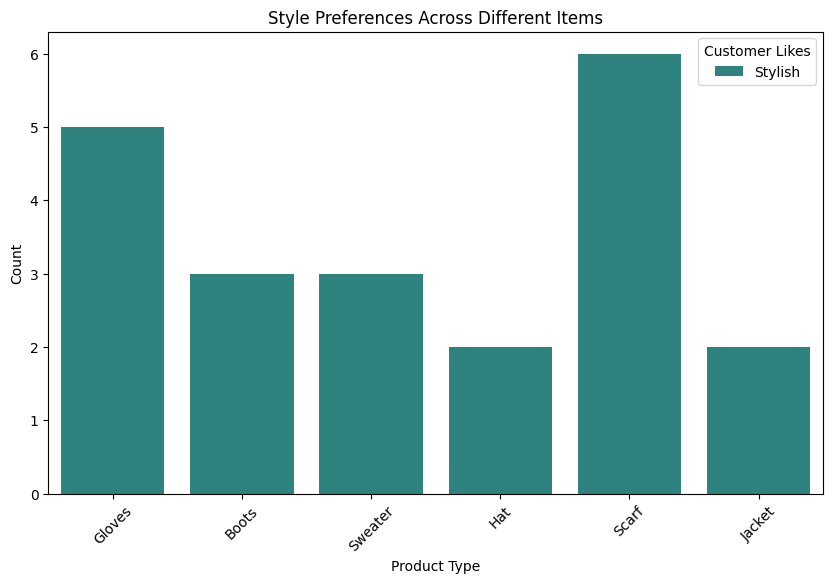

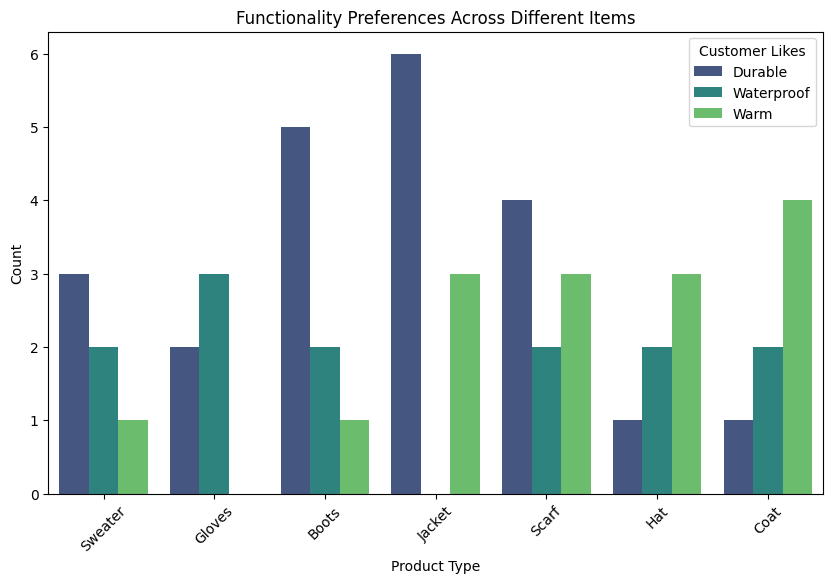

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define style and functionality preferences
style_preferences = ['Stylish']
functionality_preferences = ['Warm', 'Durable', 'Waterproof']

# Filter data for style and functionality preferences
style_likes = df[df['Customer Likes'].isin(style_preferences)]
functionality_likes = df[df['Customer Likes'].isin(functionality_preferences)]

# Visualize style preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=style_likes, x='Type', hue='Customer Likes', palette='viridis')
plt.title('Style Preferences Across Different Items')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Likes')
plt.show()

# Visualize functionality preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=functionality_likes, x='Type', hue='Customer Likes', palette='viridis')
plt.title('Functionality Preferences Across Different Items')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Likes')
plt.show()


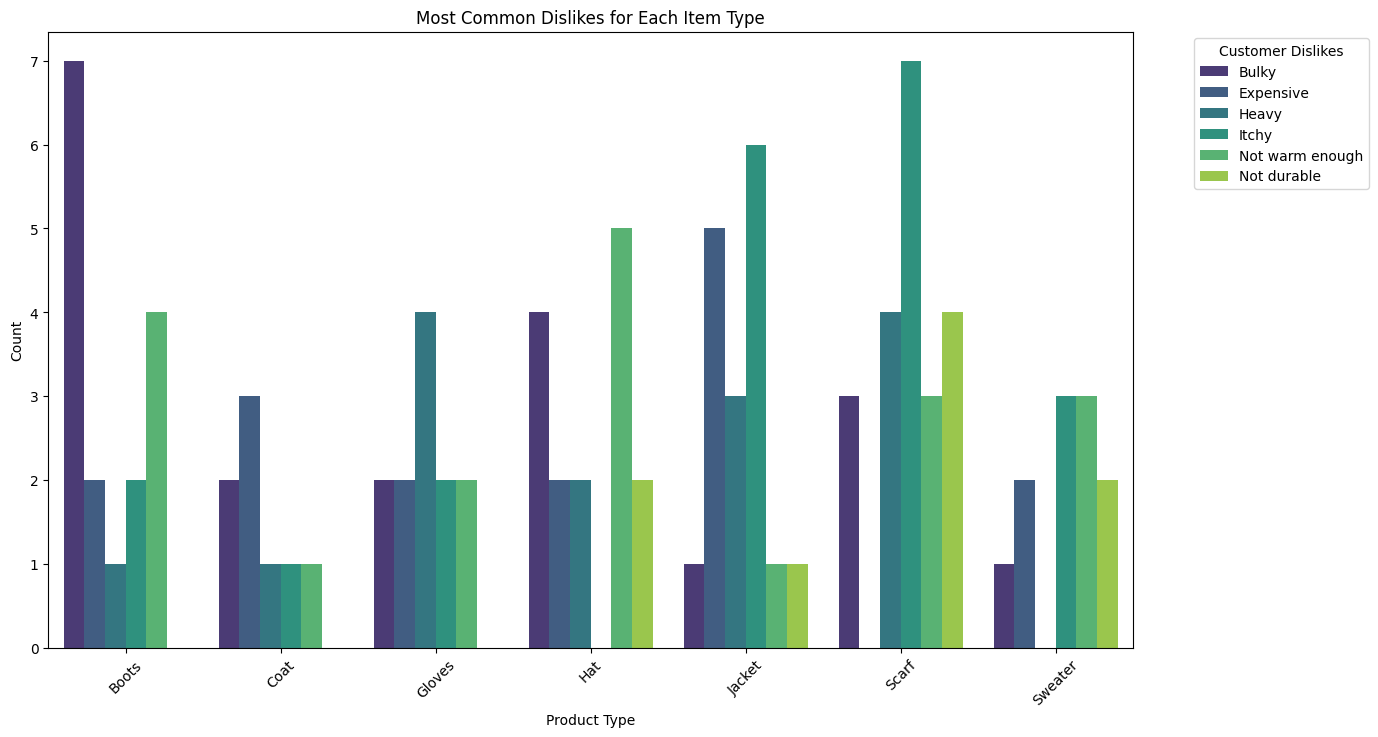

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter and count the dislikes for each item type
dislikes_count = df.groupby(['Type', 'Customer Dislikes']).size().reset_index(name='Count')

# Visualize the most common dislikes for each item type
plt.figure(figsize=(14, 8))
sns.barplot(data=dislikes_count, x='Type', y='Count', hue='Customer Dislikes', palette='viridis')
plt.title('Most Common Dislikes for Each Item Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Dislikes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-9-7a949ab8c480>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price_per_type, x='Type', y='Price', palette='viridis')


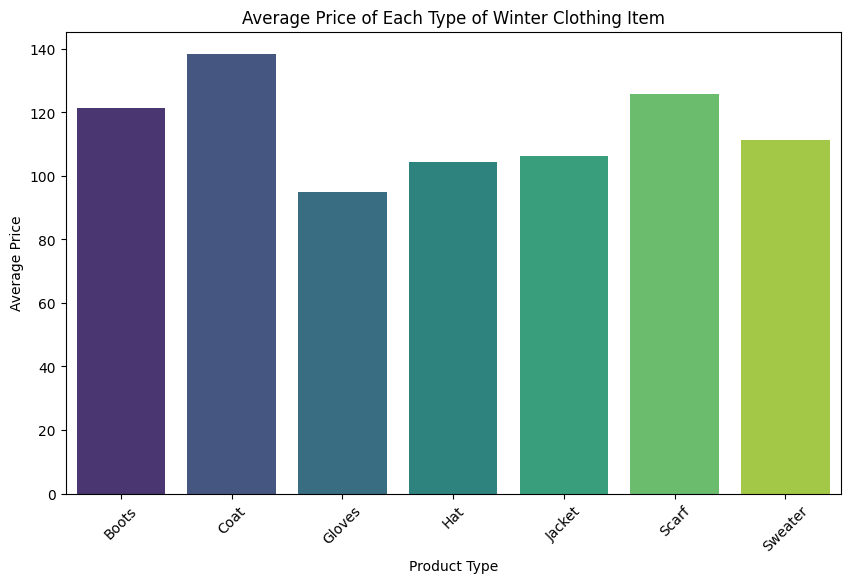

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average price of each type of winter clothing item
average_price_per_type = df.groupby('Type')['Price'].mean().reset_index()

# Visualize the average price of each type of winter clothing item
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_per_type, x='Type', y='Price', palette='viridis')
plt.title('Average Price of Each Type of Winter Clothing Item')
plt.xlabel('Product Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


        Actual    Predicted
0  Comfortable  Lightweight
1      Stylish  Lightweight
2  Comfortable      Stylish
3      Stylish  Lightweight
4      Stylish      Stylish


<ipython-input-10-75efd465b294>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=results_df, x='Predicted', palette='viridis')


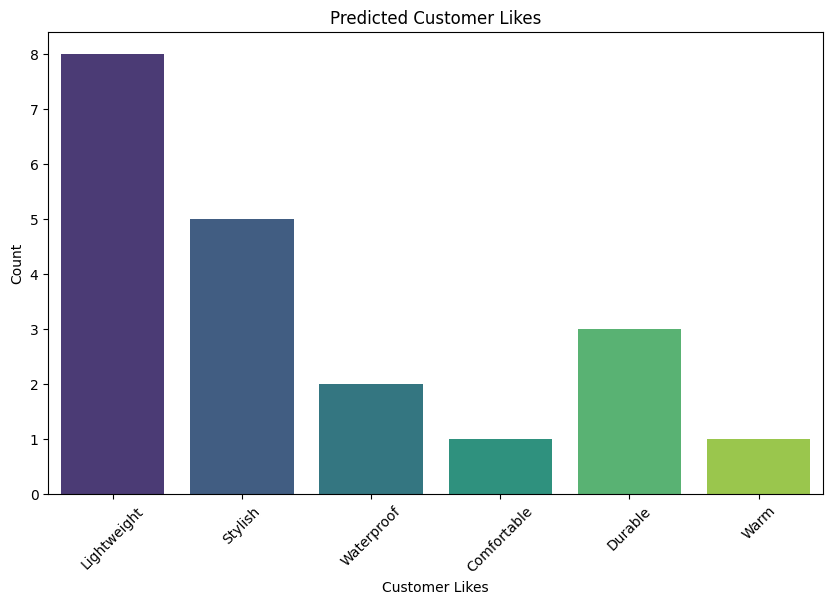

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare the data for predictive analysis
label_encoder = LabelEncoder()
df['Type_encoded'] = label_encoder.fit_transform(df['Type'])
df['Customer Preferences_encoded'] = label_encoder.fit_transform(df['Customer Preferences'])
df['Customer Likes_encoded'] = label_encoder.fit_transform(df['Customer Likes'])

# Features and target
X = df[['Type_encoded', 'Price', 'Customer Preferences_encoded']]
y = df['Customer Likes_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Map back to original labels for readability
predicted_labels = label_encoder.inverse_transform(y_pred)
actual_labels = label_encoder.inverse_transform(y_test)

# Show some predictions
results_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})
print(results_df.head())

# Visualize the results
plt.figure(figsize=(10, 6))
sns.countplot(data=results_df, x='Predicted', palette='viridis')
plt.title('Predicted Customer Likes')
plt.xlabel('Customer Likes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
